<a href="https://colab.research.google.com/github/Rohan-Patil-007/CODSOFT/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries

In [97]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reading the Dataset and Displaying

In [98]:
#Step 2: Load the Dataset
data_iris = pd.read_csv("IRIS (1).csv")  # Replace with your path if running locally

In [99]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
# Step 4: Initial Data Analysis
print("Dataset Info:\n")
print(data_iris.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# Cleaning the Dataset and finding the missing values

In [101]:
# Step 3: Drop Unnecessary Columns (like 'Id' if present)
if 'Id' in data_iris.columns:
    data_iris.drop('Id', axis=1, inplace=True)

In [102]:
print("\nMissing Values:\n")
print(data_iris.isnull().sum())



Missing Values:

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [103]:
print("\nStatistical Summary:\n")
print(data_iris.describe())


Statistical Summary:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Data Visualization

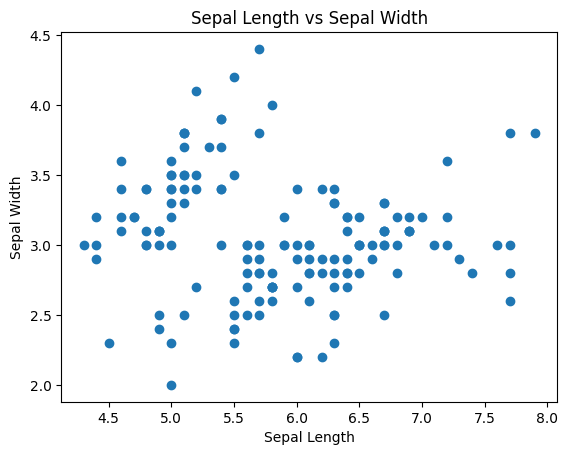

In [104]:
#  Sepal length vs Sepal widht
plt.scatter(data_iris['sepal_length'], data_iris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()


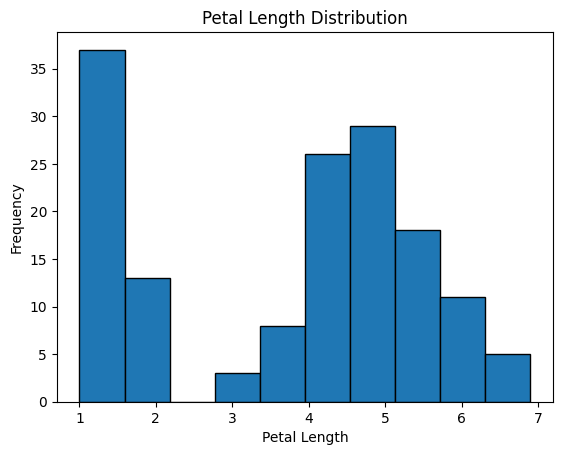

In [105]:
# Petal length Frequency
plt.hist(data_iris['petal_length'], bins=10, edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Petal Length Distribution')
plt.show()

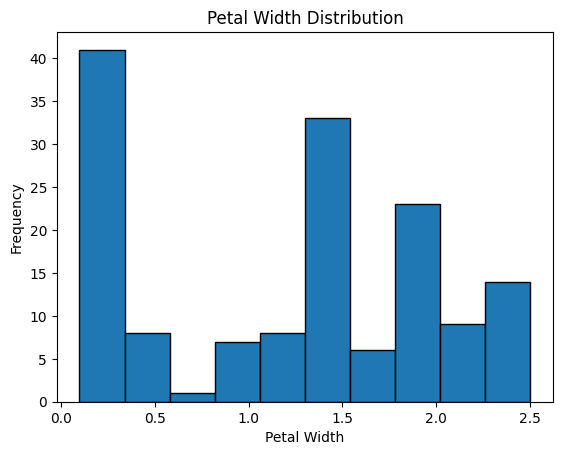

In [106]:
# Petal Width Frequency
plt.hist(data_iris['petal_width'], bins=10, edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Petal Width Distribution')
plt.show()

# Splitting the dataset into training and testing

In [107]:
# Step 6: Encode the Target Variable
le = LabelEncoder()
data_iris['species'] = le.fit_transform(data_iris['species'])

In [108]:
# Step 7: Prepare Features and Labels
X = data_iris.drop('species', axis=1)
y = data_iris['species']

In [109]:
# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the Logistic Regression

In [110]:
# Step 9: Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [111]:
# Step 10: Make Predictions
y_pred = model.predict(X_test)

# Checking the Accuracy of the trained model

In [112]:
# Step 11: Evaluate the Model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Making the prediction throught the sample Data Set

In [113]:
# Step 12: Predict on New Data (Optional)


sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]],
                      columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

prediction = model.predict(sample)

print("\nPredicted Class for sample:", le.inverse_transform(prediction)[0])


Predicted Class for sample: Iris-setosa
